In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [97]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
    return qx, qy

def dh2v(dh):
    logdh = np.log(dh)
    logv = (logdh-1.647)/-0.4619
    
    v = np.exp(logv)
    return v

def v2dh(v):
    logdh = -0.4619*np.log(v)+1.647
    
    dh = np.exp(logdh)
    return dh


In [113]:
x = np.linspace(0,100,100)
noise = np.random.rand(100)*100


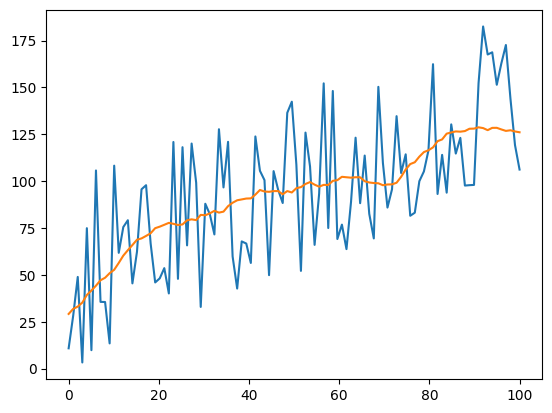

In [114]:
y = x+noise
y = savgol_filter(y, int(len(y)/2), 3, mode='nearest')

plt.plot(x,x+noise)
plt.plot(x,y)

plt.show()

In [100]:
num_layers = 80
part_len = 50 #mm
v_min = 5
max_dH = v2dh(v_min)
v_max = 15
min_dH = v2dh(v_max)
points_per_layer = 100

layer_angle = np.arcsin((max_dH-min_dH)/part_len)
rot_point = max_dH/np.tan(layer_angle)-part_len/2
print(np.rad2deg(layer_angle))
print(rot_point)
print(max_dH)
print(min_dH)
print(np.rad2deg(num_layers*layer_angle))

1.1257976619508032
100.6131657840027
2.468475190539253
1.4860946104132609
90.06381295606425


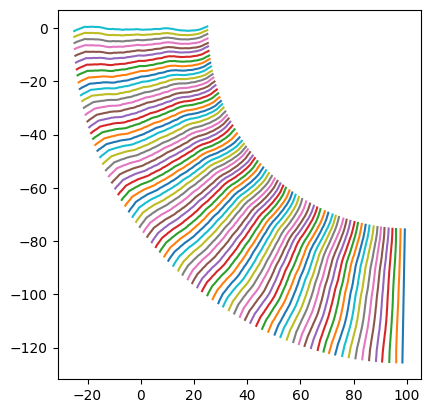

[[-2.50027877e+01 -1.09226205e+00]
 [-2.45024379e+01 -8.48093084e-01]
 [-2.40025389e+01 -5.80989078e-01]
 [-2.35001742e+01 -4.39355814e-01]
 [-2.29998084e+01 -1.96002348e-01]
 [-2.24972686e+01 -6.32768196e-02]
 [-2.19964361e+01  1.56325518e-01]
 [-2.14947927e+01  3.34665206e-01]
 [-2.09936288e+01  5.37403314e-01]
 [-2.04871738e+01  4.70894871e-01]
 [-1.99814490e+01  4.41544299e-01]
 [-1.94776520e+01  5.10295876e-01]
 [-1.89717171e+01  4.70253505e-01]
 [-1.84679285e+01  5.39429834e-01]
 [-1.79624141e+01  5.20786537e-01]
 [-1.74559304e+01  4.52814798e-01]
 [-1.69506496e+01  4.46059848e-01]
 [-1.64452632e+01  4.33927983e-01]
 [-1.59401133e+01  4.33834038e-01]
 [-1.54335013e+01  3.59334898e-01]
 [-1.49265315e+01  2.66631163e-01]
 [-1.44201779e+01  2.05282762e-01]
 [-1.39119958e+01  5.08874836e-02]
 [-1.34036985e+01 -1.09370439e-01]
 [-1.28969986e+01 -1.88340535e-01]
 [-1.23898555e+01 -2.89866040e-01]
 [-1.18839497e+01 -3.28427664e-01]
 [-1.13781744e+01 -3.60348184e-01]
 [-1.08737762e+01 -3

In [124]:
np.random.seed(1234)
def noisy_profile(nom_profile):
    noise = (np.random.rand(len(nom_profile))-0.5)
    noise_profile = savgol_filter(noise+nom_profile, int(len(nom_profile/2)), 5, mode='nearest')
    # noise_profile = noise+nom_profile
    return noise_profile
# nominal layer plot
layers = []
x_vals = np.linspace(-part_len/2, part_len/2, points_per_layer)
height_profile = np.linspace(max_dH, min_dH, points_per_layer)

curve_curved=np.zeros((num_layers*points_per_layer,2))
new_x, new_y = rotate((rot_point,0), (x_vals, height_profile), layer_angle)
# first layer
for i in range(points_per_layer):
    curve_curved[i, 0] = x_vals[i]
    curve_curved[i, 1] = height_profile[i]
for i in range(1,num_layers):
    new_x, new_y = rotate((rot_point,0), (curve_curved[:points_per_layer*i+1, 0], curve_curved[:points_per_layer*i+1,1]), layer_angle)
    curve_curved[:i*points_per_layer+1, :] = np.array([new_x, new_y]).T
    curve_curved[i*points_per_layer:(i+1)*points_per_layer, 0] = x_vals
    curve_curved[i*points_per_layer:(i+1)*points_per_layer, 1] = curve_curved[(i-1)*points_per_layer:i*points_per_layer, 1]+noisy_profile(height_profile)
#final rotation
curve_curved[:,0], curve_curved[:,1] = rotate((rot_point,0), (curve_curved[:, 0], curve_curved[:,1]), layer_angle)

fig,ax = plt.subplots()
for i in range(num_layers):
    ax.plot(curve_curved[i*points_per_layer:(i+1)*points_per_layer,0], curve_curved[i*points_per_layer:(i+1)*points_per_layer,1])
ax.set_aspect('equal')
plt.show()
print(curve_curved[-100:,:])